<a href="https://colab.research.google.com/github/DenisAksyan/1/blob/main/%D0%90%D0%BA%D1%81%D0%B5%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%94_%D0%90__21_1_Grid_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.5 MB/s eta 0:00:00


In [2]:
import h5py
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import time
import matplotlib.pyplot as plt

In [3]:
def h5pyCrF(l):
  #Создание файла
  #h5py
  start_time = time.time()
  for i in range(l):
   with h5py.File('complex_read.hdf5', 'w') as f:
    pass
   f.close()
  end_time = time.time()
  #print(f"Time taken: {end_time - start_time} seconds")
  return end_time - start_time

In [4]:
def netCDF4CrF(l):
  #Создание файла
  #netCDF4
  start_time = time.time()
  for i in range(l):
   # Создаем файл NetCDF
   nc_file = 'example1.nc'
   dataset = Dataset(nc_file, 'w', format='NETCDF4')

   # Создаем размерности (dimensions)
   #dataset.createDimension('x', arr2.shape[0])  # 10
   #dataset.createDimension('y', arr2.shape[1])  # 10

   # Создаем переменную для хранения данных
   # var = dataset.createVariable('my_variable', np.float32, ('x', 'y'))

   # Записываем данные в переменную
   #var[:] = arr2

   # Добавляем атрибуты (по желанию)
   #dataset.description = 'Пример датасета в формате NetCDF'
   #var.units = 'random values'

   # Закрываем файл
   dataset.close()
  end_time = time.time()
  #print(f"Time taken: {end_time - start_time} seconds")
  return end_time - start_time

Сравнение операций с файлами


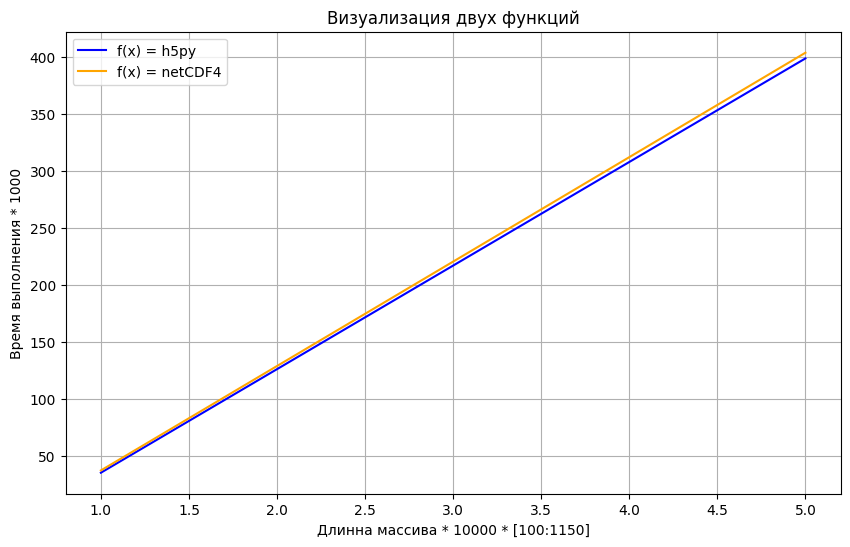

In [10]:
h5pyCrF(1)
netCDF4CrF(1)
# Генерируем значения для входного параметра
x_values = np.linspace(1, 5, 5)
print("Сравнение операций с файлами")
# Вычисляем выходные значения для обеих функций
y_values_func1 = np.linspace(int(1000 * h5pyCrF(100)), int(1000 * h5pyCrF(1150)), 5)
y_values_func2 = np.linspace(int(1000 * netCDF4CrF(100)), int(1000 * netCDF4CrF(1150)), 5)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_func1, label='f(x) = h5py', color='blue')
plt.plot(x_values, y_values_func2, label='f(x) = netCDF4', color='orange')

# Добавляем заголовок и метки осей
plt.title('Визуализация двух функций')
plt.xlabel('Длинна массива * 10000 * [100:1150]')
plt.ylabel('Время выполнения * 1000')

# Добавляем легенду
plt.legend()

# Показываем сетку
plt.grid()

# Отображаем график
plt.show()

Вывод HDF5 чуть медленнее netCDF

In [6]:
def h5pyRR(l):
  arr1 = np.random.randn(l*10000)
  arr2 = np.random.randn(l*10000)
  arr3 = np.random.randn(l*10000)
  arr4 = np.random.randn(l*10000)
  arr5 = np.random.randn(l*10000)
  #Запись в файл
  #h5py
  start_time = time.time()
  with h5py.File('complex_read.hdf5', 'w') as f:
    f.create_dataset('array_1', data=arr1)
    f.create_dataset('array_2', data=arr2)
    f.create_dataset('array_3', data=arr3)
    f.create_dataset('array_4', data=arr4)
    f.create_dataset('array_5', data=arr5)
  f.close()
  end_time = time.time()
  #print(f"Time taken: {end_time - start_time} seconds")
  return end_time - start_time

In [7]:
def h5pyRRW(l):
  arr1 = np.random.randn(l*10000)
  arr2 = np.random.randn(l*10000)
  arr3 = np.random.randn(l*10000)
  arr4 = np.random.randn(l*10000)
  arr5 = np.random.randn(l*10000)
  #Запись в файл
  #h5py
  start_time = time.time()
  with h5py.File('complex_read.hdf5', 'w') as f:
    f.create_dataset('array_1', data=arr1)
    f.create_dataset('array_2', data=arr2)
    f.create_dataset('array_3', data=arr3)
    f.create_dataset('array_4', data=arr4)
    f.create_dataset('array_5', data=arr5)
  f.close()
  #Чтение из файла
  #h5py
  start_time = time.time()
  # Открываем HDF5 файл
  file_path = 'complex_read.hdf5'
  with h5py.File(file_path, 'r') as file:
    # Просмотр всех ключей (групп и наборов данных) в файле
   # print("Ключи в файле:")
   # for key in file.keys():
       # print(key)

    # Чтение данных из конкретного набора данных
    dataset1 = 'array_1'
    data = file[dataset1][:]
  file.close()
  end_time = time.time()
  #print(f"Time taken: {end_time - start_time} seconds")
  return end_time - start_time

In [8]:
def netCDF4RR(l):
 arr2 = np.random.randn(1, l*10000)
 arr3 = np.random.randn(1, l*10000)
 arr4 = np.random.randn(1, l*10000)
 arr5 = np.random.randn(1, l*10000)
 arr1 = np.random.randn(1, l*10000)
 start_time = time.time()
 nc_file = 'example1.nc'
 dataset = Dataset(nc_file, 'w', format='NETCDF4')

  # Создаем размерности (dimensions)
 dataset.createDimension('x', 1)  # 10
 dataset.createDimension('y', arr2.shape[1])  # 10

  # Создаем переменную для хранения данных
 var = dataset.createVariable('my_variable', np.float32, ('x', 'y'))
 var1 = dataset.createVariable('my_variable1', np.float32, ('x', 'y'))
 var2 = dataset.createVariable('my_variable2', np.float32, ('x', 'y'))
 var3 = dataset.createVariable('my_variable3', np.float32, ('x', 'y'))
 var4 = dataset.createVariable('my_variable4', np.float32, ('x', 'y'))

  # Записываем данные в переменную
 var[:] = arr2
 var1[:] = arr3
 var2[:] = arr4
 var3[:] = arr5
 var4[:] = arr1
  # Добавляем атрибуты (по желанию)
  #dataset.description = 'Пример датасета в формате NetCDF'
 #var.units = 'random values'

  # Закрываем файл
 dataset.close()
 end_time = time.time()
 #print(f"Time taken: {end_time - start_time} seconds")
 return end_time - start_time

In [9]:
def netCDF4RRW(l):
 arr2 = np.random.randn(1, l*10000)
 arr3 = np.random.randn(1, l*10000)
 arr4 = np.random.randn(1, l*10000)
 arr5 = np.random.randn(1, l*10000)
 arr1 = np.random.randn(1, l*10000)

 nc_file = 'example1.nc'
 dataset = Dataset(nc_file, 'w', format='NETCDF4')

  # Создаем размерности (dimensions)
 dataset.createDimension('x', 1)  # 10
 dataset.createDimension('y', arr2.shape[1])  # 10

  # Создаем переменную для хранения данных
 var = dataset.createVariable('my_variable', np.float32, ('x', 'y'))
 var1 = dataset.createVariable('my_variable1', np.float32, ('x', 'y'))
 var2 = dataset.createVariable('my_variable2', np.float32, ('x', 'y'))
 var3 = dataset.createVariable('my_variable3', np.float32, ('x', 'y'))
 var4 = dataset.createVariable('my_variable4', np.float32, ('x', 'y'))

  # Записываем данные в переменную
 var[:] = arr2
 var1[:] = arr3
 var2[:] = arr4
 var3[:] = arr5
 var4[:] = arr1
  # Добавляем атрибуты (по желанию)
  #dataset.description = 'Пример датасета в формате NetCDF'
 #var.units = 'random values'

  # Закрываем файл
 dataset.close()
 end_time = time.time()
 #Чтение из файла
 #netCDF4
 start_time = time.time()
 dataset = nc.Dataset('example1.nc', mode='r')
 data = dataset.variables['my_variable'][:]
 data1 = dataset.variables['my_variable1'][:]
 data2 = dataset.variables['my_variable2'][:]
 data3 = dataset.variables['my_variable3'][:]
 data4 = dataset.variables['my_variable4'][:]
 dataset.close()
 end_time = time.time()
 #print(f"Time taken: {end_time - start_time} seconds")
 return end_time - start_time

Запись в файл


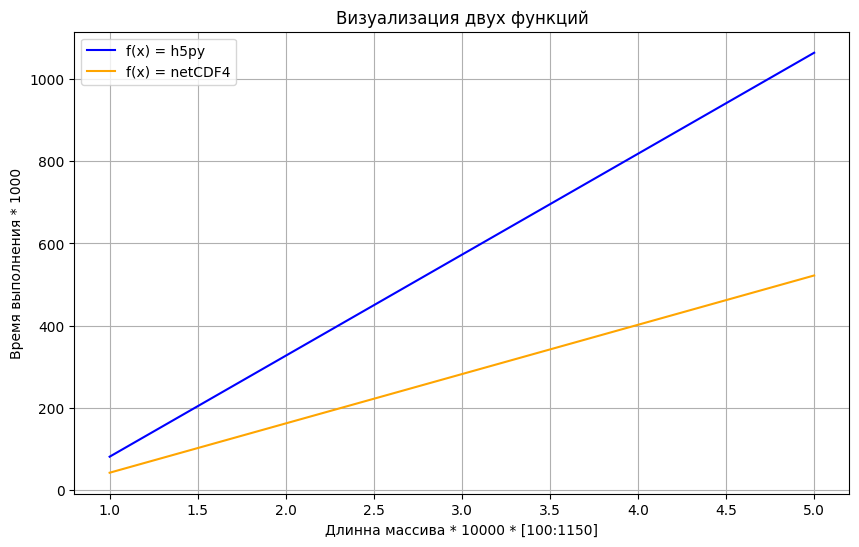

In [11]:
# Генерируем значения для входного параметра
x_values = np.linspace(1, 5, 5)
print("Запись в файл")
# Вычисляем выходные значения для обеих функций
y_values_func1 = np.linspace(int(1000 * h5pyRR(100)), int(1000 * h5pyRR(1150)), 5)
y_values_func2 = np.linspace(int(1000 * netCDF4RR(100)), int(1000 * netCDF4RR(1150)), 5)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_func1, label='f(x) = h5py', color='blue')
plt.plot(x_values, y_values_func2, label='f(x) = netCDF4', color='orange')

# Добавляем заголовок и метки осей
plt.title('Визуализация двух функций')
plt.xlabel('Длинна массива * 10000 * [100:1150]')
plt.ylabel('Время выполнения * 1000')

# Добавляем легенду
plt.legend()

# Показываем сетку
plt.grid()

# Отображаем график
plt.show()

Итог: запись в файл - netCDF4 - быстрее

Чтение из файла


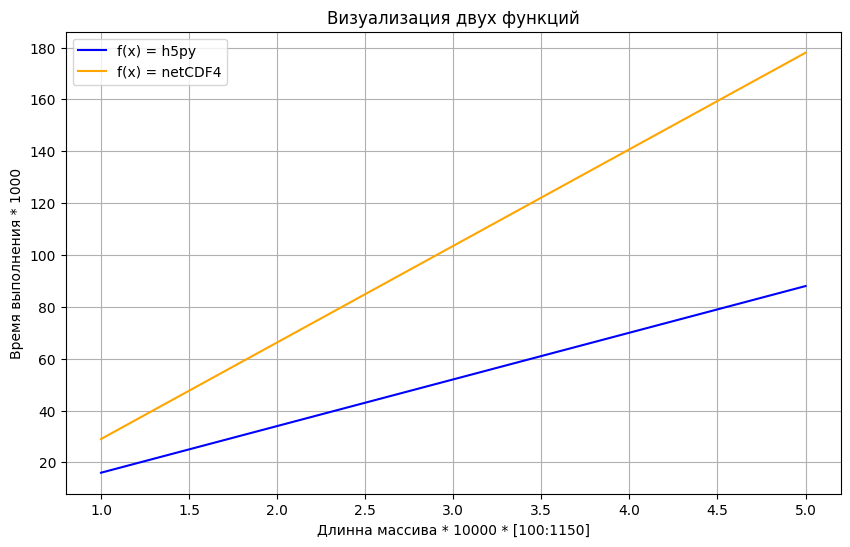

In [12]:
# Генерируем значения для входного параметра
x_values = np.linspace(1, 5, 5)
print("Чтение из файла")
# Вычисляем выходные значения для обеих функций
y_values_func1 = np.linspace(int(1000 * h5pyRRW(100)), int(1000 * h5pyRRW(1150)), 5)
y_values_func2 = np.linspace(int(1000 * netCDF4RRW(100)), int(1000 * netCDF4RRW(1150)), 5)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_func1, label='f(x) = h5py', color='blue')
plt.plot(x_values, y_values_func2, label='f(x) = netCDF4', color='orange')

# Добавляем заголовок и метки осей
plt.title('Визуализация двух функций')
plt.xlabel('Длинна массива * 10000 * [100:1150]')
plt.ylabel('Время выполнения * 1000')

# Добавляем легенду
plt.legend()

# Показываем сетку
plt.grid()

# Отображаем график
plt.show()

Итог: чтение из файла - HDF5 - быстрее

Ниже код для проверки наличия данных в переменных

In [13]:
file_path = 'complex_read.hdf5'
with h5py.File(file_path, 'r') as file:
    # Просмотр всех ключей (групп и наборов данных) в файле
    print("Ключи в файле:")
    for key in file.keys():
        print(key)

    # Чтение данных из конкретного набора данных
    dataset1 = 'array_1'
    dataset2 = 'array_2'
    dataset3 = 'array_3'
    dataset4 = 'array_4'
    dataset5 = 'array_5'
    data = file[dataset1][:]
    data1 = file[dataset2][:]
    data2 = file[dataset3][:]
    data3 = file[dataset4][:]
    data4 = file[dataset5][:]
file.close()
print(data)
print(data1)
print(data2)
print(data3)
print(data4)

Ключи в файле:
array_1
array_2
array_3
array_4
array_5
[ 1.11471255  0.26746652  0.18526807 ...  0.52622471 -0.9122868
 -0.70141788]
[ 0.97391684  0.90768989 -0.81691034 ... -0.08849991  0.17955374
 -0.24596333]
[ 0.60557226 -0.91473494  1.04939552 ...  0.21084689 -0.86246299
 -0.19946735]
[-0.45837825  0.04362151 -0.1610236  ... -1.17420666 -0.31061545
 -0.91449617]
[ 0.17148062 -0.84103423 -0.62465574 ...  1.12576037  0.85033694
  0.24853237]


In [14]:
dataset = nc.Dataset('example1.nc', mode='r')
data = dataset.variables['my_variable'][:]
data1 = dataset.variables['my_variable1'][:]
data2 = dataset.variables['my_variable2'][:]
data3 = dataset.variables['my_variable3'][:]
data4 = dataset.variables['my_variable4'][:]
dataset.close()
print(data)
print(data1)
print(data2)
print(data3)
print(data4)

[[-1.0843935   0.8036573  -0.03396735 ...  0.27146006  0.6549549
  -0.85130996]]
[[ 0.70087755  1.5767682  -0.6118887  ...  1.2740704  -1.4298176
  -0.53642374]]
[[-0.89956105  0.78172886 -1.0371788  ... -0.35428753 -0.12562227
   0.45143282]]
[[-0.9830361  -1.3171741   1.4177953  ... -0.03119748  0.23562996
   0.1151148 ]]
[[-3.5026278   0.48030382  0.8575302  ...  0.1975601   0.61659807
  -0.7887342 ]]
